# Initial Exploration of the Top Tagging Jet Dataset

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [68]:
import numpy as np
import os
import h5py
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Load Data

In [9]:
input_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/top_tagging/raw_input"
input_file = "train.h5"

In [10]:
with pd.HDFStore(os.path.join(input_dir, input_file), mode='r') as store:
        df = store['table']

## Distributions

In [11]:
def plot_energies(jet_series): 
    energies = [jet_series[f'E_{i}'] for i in range(200)]
    sns.distplot(energies)

Maximum energy distribution

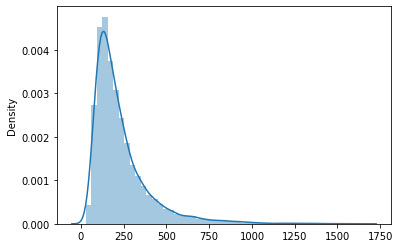

In [12]:
sns.distplot([df.iloc[i]["E_0"] for i in range(10000)])

In [16]:
df.columns.tolist()

['E_0',
 'PX_0',
 'PY_0',
 'PZ_0',
 'E_1',
 'PX_1',
 'PY_1',
 'PZ_1',
 'E_2',
 'PX_2',
 'PY_2',
 'PZ_2',
 'E_3',
 'PX_3',
 'PY_3',
 'PZ_3',
 'E_4',
 'PX_4',
 'PY_4',
 'PZ_4',
 'E_5',
 'PX_5',
 'PY_5',
 'PZ_5',
 'E_6',
 'PX_6',
 'PY_6',
 'PZ_6',
 'E_7',
 'PX_7',
 'PY_7',
 'PZ_7',
 'E_8',
 'PX_8',
 'PY_8',
 'PZ_8',
 'E_9',
 'PX_9',
 'PY_9',
 'PZ_9',
 'E_10',
 'PX_10',
 'PY_10',
 'PZ_10',
 'E_11',
 'PX_11',
 'PY_11',
 'PZ_11',
 'E_12',
 'PX_12',
 'PY_12',
 'PZ_12',
 'E_13',
 'PX_13',
 'PY_13',
 'PZ_13',
 'E_14',
 'PX_14',
 'PY_14',
 'PZ_14',
 'E_15',
 'PX_15',
 'PY_15',
 'PZ_15',
 'E_16',
 'PX_16',
 'PY_16',
 'PZ_16',
 'E_17',
 'PX_17',
 'PY_17',
 'PZ_17',
 'E_18',
 'PX_18',
 'PY_18',
 'PZ_18',
 'E_19',
 'PX_19',
 'PY_19',
 'PZ_19',
 'E_20',
 'PX_20',
 'PY_20',
 'PZ_20',
 'E_21',
 'PX_21',
 'PY_21',
 'PZ_21',
 'E_22',
 'PX_22',
 'PY_22',
 'PZ_22',
 'E_23',
 'PX_23',
 'PY_23',
 'PZ_23',
 'E_24',
 'PX_24',
 'PY_24',
 'PZ_24',
 'E_25',
 'PX_25',
 'PY_25',
 'PZ_25',
 'E_26',
 'PX_26',
 'PY_26

Distributions of P_x, P_y, P_z

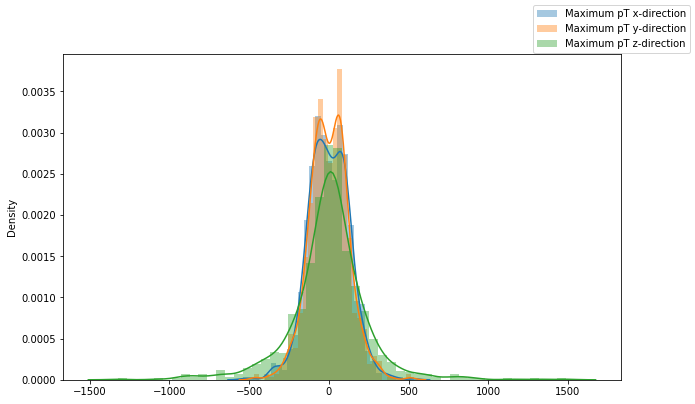

In [25]:
num_jets = 1000
fig = plt.figure(figsize=(10,6))
sns.distplot([df.iloc[i]["PX_0"] for i in range(num_jets)], label="Maximum pT x-direction")
sns.distplot([df.iloc[i]["PY_0"] for i in range(num_jets)], label="Maximum pT y-direction")
sns.distplot([df.iloc[i]["PZ_0"] for i in range(num_jets)], label="Maximum pT z-direction")
fig.legend()

Text(0.5, 0, 'Transverse Momentum of Most Energetic Constituent (GeV)')

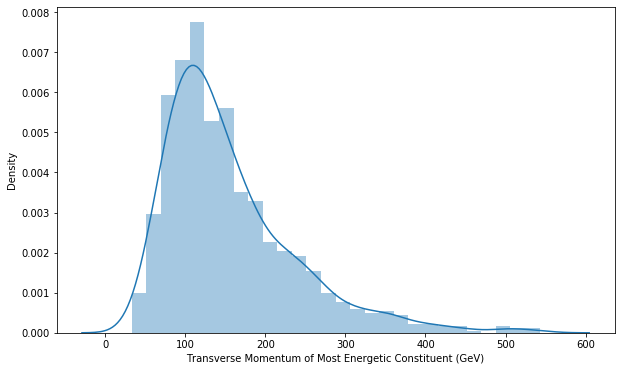

In [31]:
num_jets = 1000
fig = plt.figure(figsize=(10,6))
sns.distplot([np.sqrt(df.iloc[i]["PX_0"]**2 + df.iloc[i]["PY_0"]**2) for i in range(num_jets)])
plt.xlabel("Transverse Momentum of Most Energetic Constituent (GeV)")

## Calorimetry Image

Convert to phi, eta, plot 2D weighted histogram

In [49]:
def calc_eta_phi(x, y, z):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(r, z)
    eta = -1. * np.log(np.tan(theta / 2.))
    phi = np.arctan2(y, x)
    
    return eta, phi

In [35]:
df.columns.tolist()

['E_0',
 'PX_0',
 'PY_0',
 'PZ_0',
 'E_1',
 'PX_1',
 'PY_1',
 'PZ_1',
 'E_2',
 'PX_2',
 'PY_2',
 'PZ_2',
 'E_3',
 'PX_3',
 'PY_3',
 'PZ_3',
 'E_4',
 'PX_4',
 'PY_4',
 'PZ_4',
 'E_5',
 'PX_5',
 'PY_5',
 'PZ_5',
 'E_6',
 'PX_6',
 'PY_6',
 'PZ_6',
 'E_7',
 'PX_7',
 'PY_7',
 'PZ_7',
 'E_8',
 'PX_8',
 'PY_8',
 'PZ_8',
 'E_9',
 'PX_9',
 'PY_9',
 'PZ_9',
 'E_10',
 'PX_10',
 'PY_10',
 'PZ_10',
 'E_11',
 'PX_11',
 'PY_11',
 'PZ_11',
 'E_12',
 'PX_12',
 'PY_12',
 'PZ_12',
 'E_13',
 'PX_13',
 'PY_13',
 'PZ_13',
 'E_14',
 'PX_14',
 'PY_14',
 'PZ_14',
 'E_15',
 'PX_15',
 'PY_15',
 'PZ_15',
 'E_16',
 'PX_16',
 'PY_16',
 'PZ_16',
 'E_17',
 'PX_17',
 'PY_17',
 'PZ_17',
 'E_18',
 'PX_18',
 'PY_18',
 'PZ_18',
 'E_19',
 'PX_19',
 'PY_19',
 'PZ_19',
 'E_20',
 'PX_20',
 'PY_20',
 'PZ_20',
 'E_21',
 'PX_21',
 'PY_21',
 'PZ_21',
 'E_22',
 'PX_22',
 'PY_22',
 'PZ_22',
 'E_23',
 'PX_23',
 'PY_23',
 'PZ_23',
 'E_24',
 'PX_24',
 'PY_24',
 'PZ_24',
 'E_25',
 'PX_25',
 'PY_25',
 'PZ_25',
 'E_26',
 'PX_26',
 'PY_26

In [73]:
def get_eta_phi_values(jet_series):
    
    energies = np.array([jet_series[f'E_{i}'] for i in range(200)])
    x_values = np.array([jet_series[f'PX_{i}'] for i in range(200)])
    y_values = np.array([jet_series[f'PY_{i}'] for i in range(200)])
    z_values = np.array([jet_series[f'PZ_{i}'] for i in range(200)])

    existing_jet_mask = energies > 0
    energies, x_values, y_values, z_values = energies[existing_jet_mask], x_values[existing_jet_mask], y_values[existing_jet_mask], z_values[existing_jet_mask]

    eta_values, phi_values = calc_eta_phi(x_values, y_values, z_values)
    
    return eta_values, phi_values, energies

Example jet image

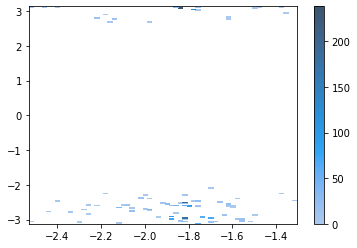

In [75]:
jet_number = 10

eta_values, phi_values, energies = get_eta_phi_values(df.iloc[jet_number])

sns.histplot(x = eta_values, y = phi_values, weights = energies, binwidth=0.02, palette=matplotlib.colors.Colormap("viridis"), cbar=True)
# sns.histplot(x = x_values, y = y_values, weights = energies, binwidth=2)

All jet images

In [160]:
%%time
num_jets  = 10000
df_sample = df.sample(n = num_jets)

all_eta_values, all_phi_values, all_energies = [], [], []

for jet in range(len(df_sample)):
    
    eta_values, phi_values, energies = get_eta_phi_values(df_sample.iloc[jet])
    
    all_eta_values.append(eta_values)
    all_phi_values.append(phi_values)
    all_energies.append(energies)
    
all_eta_values = np.concatenate(all_eta_values)
all_phi_values = np.concatenate(all_phi_values)
all_energies = np.concatenate(all_energies)

CPU times: user 42.3 s, sys: 740 ms, total: 43.1 s
Wall time: 43.1 s


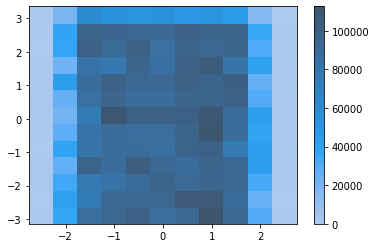

In [161]:
sns.histplot(x = all_eta_values, y = all_phi_values, weights = all_energies, binwidth=0.5, palette=matplotlib.colors.Colormap("viridis"), cbar=True)

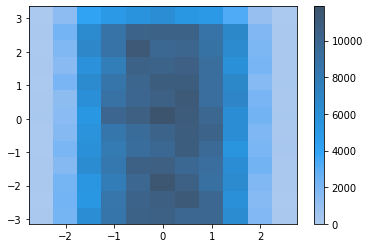

In [162]:
sns.histplot(x = all_eta_values, y = all_phi_values, weights = np.log(all_energies), binwidth=0.5, palette=sns.color_palette("rocket", n_colors=100, as_cmap=True), cbar=True)

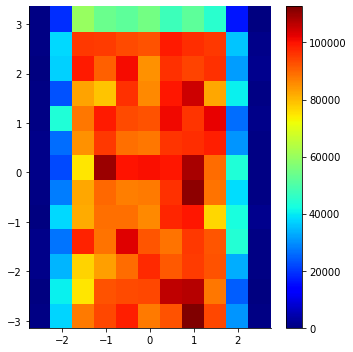

In [163]:
sns.displot(x = all_eta_values, y = all_phi_values, weights = all_energies, binwidth=0.5, cmap=matplotlib.cm.jet,  cbar=True)

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


CPU times: user 26.3 s, sys: 5.34 ms, total: 26.3 s
Wall time: 26.3 s


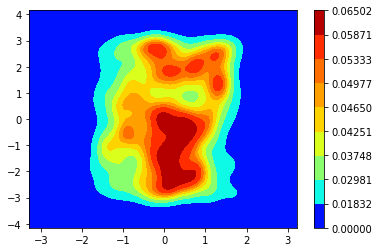

In [159]:
%%time
sns.kdeplot(x = all_eta_values, y = all_phi_values, shade=True, shade_lowest=True, cmap=matplotlib.cm.jet, cbar=True)